In [ ]:
# Simulated Annealing
# Implement Simulated Annealing Algorithm in either Mathematica or Python.

# The algorithm description can be found in the related lectures.
# Your algorithm must have these inputs:
# Test function
# Input domain of the test function
# Dimension size
# Number of repetitions of Metropolis algorithm
# Neighborhood radius - percentage of the hyperspace
# Initial temperature
# Final temperature
# Temperature reduction

# The algorithm must provide at the output:
# Best found value of objective function f(x)
# The value of x of the best found f(x)
# Convergence graph of the development of the f(x)
# An example, together with the useful tips, can be found in the support document.

# Test your algorithm on the test functions from Task 1.
# Again, you have approximately two weeks to accomplish this task.
# If you submit your first attempt after a deadline, you will receive -2 points. The maximum points achievable for this task is 10 points.
# You have two attempts to accomplish this task (the second attempt can be submitted after the deadline without any further penalization).

In [ ]:
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing(cost_function, bounds, initial_temperature, cooling_rate, stopping_temperature, max_iterations):
    # Generate a random starting solution within the given bounds
    current_solution = [random.uniform(bounds[0], bounds[1]) for i in range(len(bounds))]
    # Compute the cost of the starting solution
    current_cost = cost_function(current_solution)
    # Set the best solution and best cost to be the current solution and cost
    best_solution = current_solution
    best_cost = current_cost
    # Set the initial temperature
    temperature = initial_temperature
    # Initialize an empty list to store the history of the best cost at each iteration
    history = []

    # Loop through the specified number of iterations
    for i in range(max_iterations):
        # Generate a random neighbor solution by perturbing the current solution
        neighbor_solution = [current_solution[j] + random.uniform(-1, 1) * temperature for j in range(len(bounds))]
        # Ensure that the neighbor solution is within the given bounds
        neighbor_solution = [min(max(neighbor_solution[j], bounds[0]), bounds[1]) for j in range(len(bounds))]
        # Compute the cost of the neighbor solution
        neighbor_cost = cost_function(neighbor_solution)
        # Compute the difference in cost between the neighbor solution and the current solution
        cost_delta = neighbor_cost - current_cost

        # If the neighbor solution is better than the current solution, accept it as the new current solution
        if cost_delta < 0:
            current_solution = neighbor_solution
            current_cost = neighbor_cost
            # If the current solution is better than the best solution, update the best solution and best cost
            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost
        # If the neighbor solution is worse than the current solution, accept it with a certain probability
        else:
            acceptance_probability = math.exp(-cost_delta / temperature)
            if random.random() < acceptance_probability:
                current_solution = neighbor_solution
                current_cost = neighbor_cost

        # Reduce the temperature according to the cooling rate
        temperature *= cooling_rate
        # Append the best cost at this iteration to the history list
        history.append(best_cost)

        # If the temperature falls below the stopping temperature, break out of the loop
        if temperature < stopping_temperature:
            break

    # Return the best solution, best cost, and history list
    return best_solution, best_cost, history

Minimum value: 0.12447392437730836
Solution: [-0.2969466178919612, -0.190516745982693]


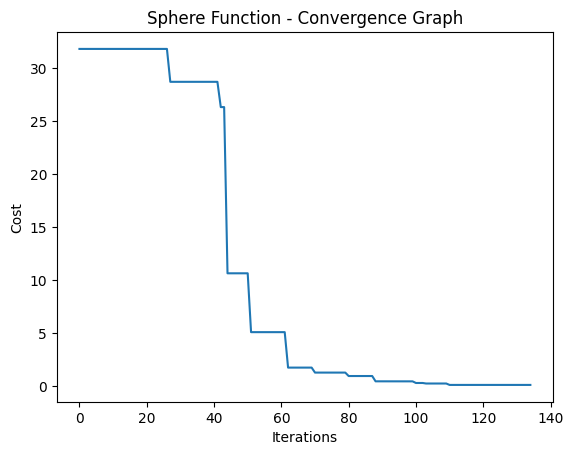

In [ ]:
#Sphere Function
def sphere(x):
    return sum([xi**2 for xi in x])

bounds = (-5.12, 5.12)
initial_temperature = 100.0
cooling_rate = 0.95
stopping_temperature = 0.1
max_iterations = 10000

solution, cost, history = simulated_annealing(sphere, bounds, initial_temperature, cooling_rate, stopping_temperature, max_iterations)
print("Minimum value:", cost)
print("Solution:", solution)

plt.plot(history)
plt.title("Sphere Function - Convergence Graph")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Minimum value: 0.4247691499999139
Solution: [0.34986286425645324, 0.12697661028255028]


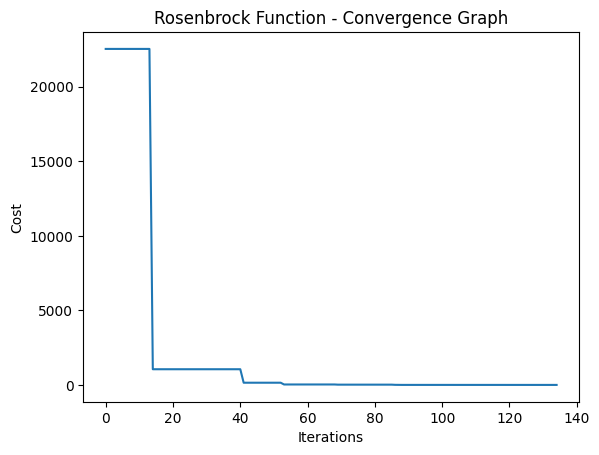

In [ ]:
#Rosenbrock Function
def rosenbrock(x):
  return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x)-1))

bounds = (-5, 10)
initial_temperature = 100.0
cooling_rate = 0.95
stopping_temperature = 0.1
max_iterations = 10000

solution, cost, history = simulated_annealing(rosenbrock, bounds, initial_temperature, cooling_rate, stopping_temperature, max_iterations)
print("Minimum value:", cost)
print("Solution:", solution)

plt.plot(history)
plt.title("Rosenbrock Function - Convergence Graph")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Minimum value: -0.9980300345726799
Solution: [0.0470058683189689, 4.3840110408010595]


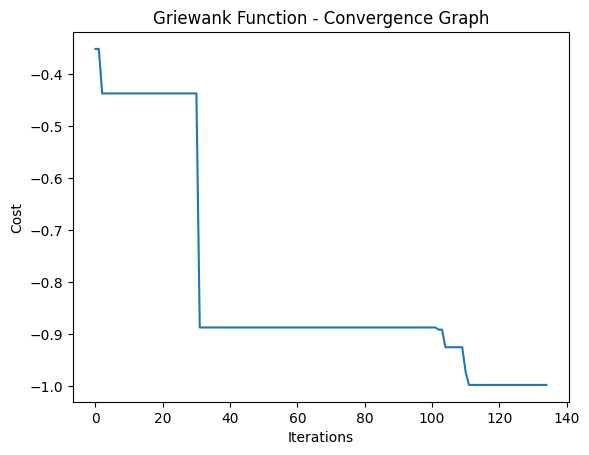

In [ ]:
#Griewank Function
def griewank(xx):
  sum_of_num = 0
  pr = 1
  for idx, x in enumerate(xx, 1):
    sum_of_num += x**2/4000
    pr *= math.cos(x/math.sqrt(idx))
    y = sum_of_num - pr + 1
  return pr

bounds = (-5.12, 5.12)
initial_temperature = 100.0
cooling_rate = 0.95
stopping_temperature = 0.1
max_iterations = 10000

solution, cost, history = simulated_annealing(griewank, bounds, initial_temperature, cooling_rate, stopping_temperature, max_iterations)
print("Minimum value:", cost)
print("Solution:", solution)

plt.plot(history)
plt.title("Griewank Function - Convergence Graph")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Minimum value: 5.088020087648578
Solution: [1.9664171517334197, 0.9902103283526205]


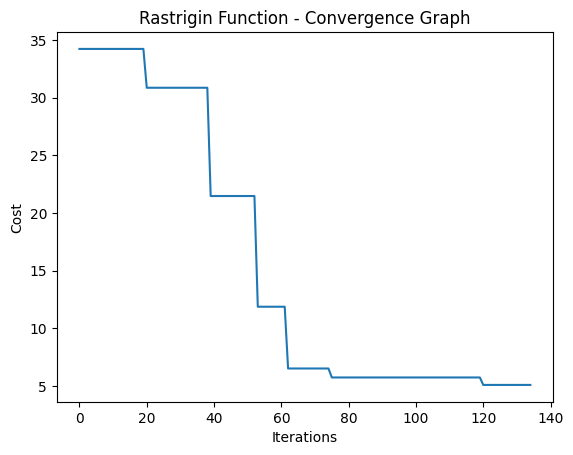

In [ ]:
def rastrigin(x):
  A = 10
  n = len(x)
  return A * n + sum(xi**2 - A * math.cos(2 * math.pi * xi) for xi in x)

bounds = (-5.12, 5.12)
initial_temperature = 100.0
cooling_rate = 0.95
stopping_temperature = 0.1
max_iterations = 10000

solution, cost, history = simulated_annealing(rastrigin, bounds, initial_temperature, cooling_rate, stopping_temperature, max_iterations)
print("Minimum value:", cost)
print("Solution:", solution)

plt.plot(history)
plt.title("Rastrigin Function - Convergence Graph")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Minimum value: 14.466367941831066
Solution: [7.915043579415495, -1.1981451004939219]


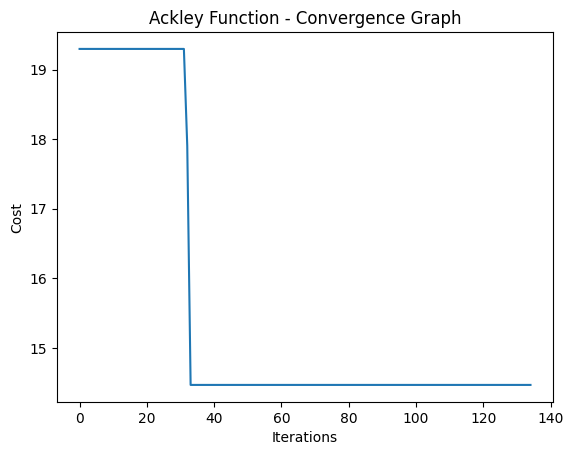

In [ ]:
# Ackley Function
def ackley(x):
  n = len(x)
  sum1 = sum(xi**2 for xi in x)
  sum2 = sum(math.cos(2 * math.pi * xi) for xi in x)
  term1 = -20 * math.exp(-0.2 * math.sqrt(1/n * sum1))
  term2 = -math.exp(1/n * sum2)
  return term1 + term2 + 20 + math.e

bounds = (-32.768, 32.768)
initial_temperature = 100.0
cooling_rate = 0.95
stopping_temperature = 0.1
max_iterations = 10000

solution, cost, history = simulated_annealing(ackley, bounds, initial_temperature, cooling_rate, stopping_temperature, max_iterations)
print("Minimum value:", cost)
print("Solution:", solution)

plt.plot(history)
plt.title("Ackley Function - Convergence Graph")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()